# Project 1: SAT & ACT Analysis

# How do we go about increasing SAT participation in NY State?
### by Jared Delora-Ellefson

## Executive Summary

**Problem Statement**: How can we increase SAT test participation in New York State?

**An analysis of 2017, 2018 SAT and ACT data, focused on New York State.**
SAT Participation rates in NY State match those of the ACT, despite the heavy focus the school systems puts on SAT preparation. Increasing funding for one-on-one SAT test preparation for everyone would do two things:
- Increase SAT scores in NY State
- Increase interest in taking the SAT due to the additional resources available

## Summary of Conclusions

One-on-one tutoring is highly effective at raising SAT scores, but due to socio-economic conditions this one-on-one test prep isn't available to everyone. Funding for one-on-one SAT test preparation for everyone would do two things:
- Increase SAT scores in NY State
- Increase interest in taking the SAT due to the additional resources available

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [6]:
clear()

**We wil import the libraries we need:**

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [9]:
# This code imports ACT and SAT Scores for 2017
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [11]:
# using .head to display the top ten rows of the DataFrame
sat_2017.head(10) # Displays the top ten rows in the SAT Dataframe

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [205]:
act_2017.head(10) # Displays the top ten rows in the ACT Dataframe

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:**

Some things that strike me upon looking at the top ten values of the 2017 SAT & ACT Dataframes:
- Many States that have high SAT participation percentages, but low ACT percentages. This could be due to what tests the collegs in the State accept.
- I would like to look up the definition of 'Evidence-Based Reading and Writing' in the SAT to see how it may correlate with ACT subject scores.
- The ACT has a National Average included in the data. We can calculate this value for the SAT data and compare.
- Alabama and Arkansas both have 100% ACT participation rates? That sounds a bit suspect to me, although both States have very low SAT participation rates.
- The Participation Column needs to be cleaned

#### 4a. Does the data look complete? 

**Answer:** 

It looks complete based on the top 10 rows of each Dataframe, but the Dataframes should be searched for any NaN, etc. values. The search performed below shows that there are no null values in the Dataframes.

In [12]:
print(sat_2017.isnull().values.any())
print(act_2017.isnull().values.any())

False
False


**The following code looks at the data types in our 2017 SAT and ACT Dataframes. In the SAT Dataframe the Participation values are listed as objects. These need to be converted to floats. In the ACT Dataframe both the Participation and Composite series objects need to be converted to floats.**

In [15]:
print(sat_2017.dtypes)
print(act_2017.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:**

**- SAT Combined score is between 320 to 1520**

**- SAT Reading/Writing and the Math section are each scored on a 200 to 800**

**- ACT Combined score is between 400 to 1600**

**- ACT English, Mathematics, Reading, and Science falls on a range between 1 (low) and 36 (high)**

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [16]:
#code
print(sat_2017.dtypes)
print()
print(act_2017.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


#### 5. What are your data types? 
The following are the various Data Types in my DataFrames:

In [209]:
#code
print('sat_2017 Data Types')
print('State: ' + str(sat_2017['State'].dtypes))
print('Participation:' + str(sat_2017['Participation'].dtypes))
print('Evidence-Based Reading and Writing: ' + str(sat_2017['Evidence-Based Reading and Writing'].dtypes))
print('Math: ' + str(sat_2017['Math'].dtypes))
print('Total: ' + str(sat_2017['Total'].dtypes))

sat_2017 Data Types
State: object
Participation:object
Evidence-Based Reading and Writing: int64
Math: int64
Total: int64


In [210]:
#code
print('act_2017 Data Types')
print('State: ' + str(act_2017['State'].dtypes))
print('Participation:' + str(act_2017['Participation'].dtypes))
print('English: ' + str(act_2017['English'].dtypes))
print('Math: ' + str(act_2017['Math'].dtypes))
print('Reading: ' + str(act_2017['Reading'].dtypes))
print('Science: ' + str(act_2017['Science'].dtypes))
print('Composite: ' + str(act_2017['Composite'].dtypes))

act_2017 Data Types
State: object
Participation:object
English: float64
Math: float64
Reading: float64
Science: float64
Composite: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 
**This does seem odd. I would expect participation to be a float, but instead it is an object. We need to convert this object into floats.**

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [217]:
# We will first fix the Participation data such that it is a float
def data_changer(x):
#    x = x.apply(lambda y : float(str(y).split('%')[0]))
    x = x.apply(lambda y : float(str(y).split('x')[0]))
#    print(x)
    return x
# sat_2017['Participation'] = data_changer(sat_2017['Participation'])
# sat_2017.dtypes

- Fix any individual values preventing other columns from being the appropriate type, then display the column data types for each DataFrame.

In [214]:
# First we will fix the Participation values in the SAT Data
# for i in ['Participation']:
sat_2017['Participation'] = data_changer(sat_2017['Participation'])

sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [215]:
# Next we will fix the Participation values in the ACT Data
act_2017['Participation'] = data_changer(act_2017['Participation'])
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [218]:
# Lastly we will fix the Composite values in the ACT Data
act_2017['Composite'] = data_changer(act_2017['Composite'])
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

In [219]:
#Code:
print('SAT 2017 Data Types')
print(sat_2017.dtypes)
print()
print('ACT 2017 Data Types')
print(act_2017.dtypes)

SAT 2017 Data Types
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

ACT 2017 Data Types
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [17]:
# Creat a new column to redefine the column names for the ACT DataFrame
print('ACT Values')
# List Replacement Method
new_columns_list = [
    'state',
    'act_2017_participation',
    'act_2017_english',
    'act_2017_math',
    'act_2017_reading',
    'act_2017_science',
    'act_2017_composite',
]
# Assigning new Column names
act_2017.columns = new_columns_list
act_2017.head()

ACT Values


,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [18]:
# Creat a new column to redefine the column names for the SAT DataFrame
print('SAT Values')
# List Replacement Method
new_columns_list = [
    'sat_state',
    'sat_2017_participation',
    'sat_2017_reading_writing',
    'sat_2017_math',
    'sat_2017_total',
]
# Assigning new Column names
sat_2017.columns = new_columns_list
sat_2017.head()

SAT Values


,sat_state,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


**Dictionay defining terms for the 2017 & 2018 SAT and ACT DataFrames:**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|2018 Data follows 2017 naming structure|
|sat_2017_participation|float|SAT|The SAT participation percentage in 2017 (0-100).|
|sat_2017_reading_writing|int|SAT|The average SAT writing score in 2017 (200-800).|
|sat_2017_math|int|SAT|The average SAT math score  in 2017 (200-800).|
|sat_2017_total|int|SAT|The average SAT total score in 2017 (400-1600).|
|act_2017_participation|float|ACT|The ACT participation percentage in 2017 (0-100).|
|act_2017_english|float|ACT|The average ACT english score in 2017 (1-36).|
|act_2017_math|float|ACT|The average ACT math score in 2017 (1-36).|
|act_2017_reading|float|ACT|The average ACT reading score in 2017 (1-36).|
|act_2017_science|float|ACT|The average ACT science score in 2017 (1-36).|
|act_2017_composite|float|ACT|The avererage composite ACT score in 2017 (1-36).|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [223]:
# The column needs to be dropped
act_2017 = act_2017.drop(act_2017.index[0])

In [230]:
act_2017.head()

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


In [23]:
# List Replacement Method
new_columns_list = [
    'sat_state',
    'sat_2017_participation',
    'sat_2017_reading_writing',
    'sat_2017_math',
    'sat_2017_total',
]
# Assign new column names
sat_2017.columns = new_columns_list
sat_2017.head()

,sat_state,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [251]:
#Code:
df1 = act_2017
df2 = sat_2017
combined = pd.concat([df1, df2.reindex(df1.index)], axis=1)

# We want to drop the state column associated with the ACT state column
combined.drop(['sat_state'], axis=1, inplace = True)

combined.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,38.0,547.0,533.0,1080.0
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,30.0,563.0,553.0,1116.0
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,3.0,614.0,594.0,1208.0
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,53.0,531.0,524.0,1055.0
5,California,31.0,22.5,22.7,23.1,22.2,22.8,11.0,606.0,595.0,1201.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [252]:
# Write our combined data to a .csv file
combined.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [28]:
# Importing the SAT and ACT .csv files
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [29]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [40]:
# Returning just the columns for NY
act_2018[act_2018['State'] == 'Maine']

,State,Participation,Composite
19,Maine,7%,24.0
20,Maine,7%,24.0


**There are two identical rows for Maine in the ACT 2018 Data, we will delete one**

In [42]:
act_2018 = act_2018.drop(act_2018.index[19])

In [34]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

**We will now fix our object types:**

In [318]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [319]:
# We will first fix the object such that are a float
def data_changer(x):
    x = x.apply(lambda y : float(str(y).split('%')[0]))
    return x


In [320]:
# SAT 2018 Participation data change
sat_2018['Participation'] = data_changer(sat_2018['Participation'])

sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [321]:
# ACT 2018 Participation data change
act_2018['Participation'] = data_changer(act_2018['Participation'])
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [44]:
# Renaiming the 2018 SAT column names
print('ACT Values')
new_columns_list = [
    'state',
    'act_2018_participation',
    'act_2018_composite',
]
act_2018.columns = new_columns_list
act_2018.head()

ACT Values


,state,act_2018_participation,act_2018_composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [323]:
# Renaiming the 2018 SAT column names
print('SAT Values')
new_columns_list = [
    'sat_state',
    'sat_2018_participation',
    'sat_2018_reading_writing',
    'sat_2018_math',
    'sat_2018_total',
]
sat_2018.columns = new_columns_list
sat_2018.head()

SAT Values


,sat_state,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [324]:
# Now we will combine our 2017 SAT and ACT DataFrames
df1 = act_2018
df2 = sat_2018
combined = pd.concat([df1, df2.reindex(df1.index)], axis=1)
combined.head()

,state,act_2018_participation,act_2018_composite,sat_state,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,100.0,19.1,Alabama,6.0,595.0,571.0,1166.0
1,Alaska,33.0,20.8,Alaska,43.0,562.0,544.0,1106.0
2,Arizona,66.0,19.2,Arizona,29.0,577.0,572.0,1149.0
3,Arkansas,100.0,19.4,Arkansas,5.0,592.0,576.0,1169.0
4,California,27.0,22.7,California,60.0,540.0,536.0,1076.0


In [325]:
#We will drop the column associated with the SAT states, the are redundant. The ACT State Column will be used instead.
combined.drop(['sat_state'], axis=1, inplace = True)
combined.head()

,state,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,100.0,19.1,6.0,595.0,571.0,1166.0
1,Alaska,33.0,20.8,43.0,562.0,544.0,1106.0
2,Arizona,66.0,19.2,29.0,577.0,572.0,1149.0
3,Arkansas,100.0,19.4,5.0,592.0,576.0,1169.0
4,California,27.0,22.7,60.0,540.0,536.0,1076.0


In [328]:
combined.shape

(51, 7)

**We will now write our Combined DataFrame to a .csv file:**

In [329]:
# Write combined data to a .csv file
combined.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

**I will first clear out the jupyter memory and deal with just the combined data:**

In [55]:
clear()

In [57]:
#Import our libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [58]:
# Read .csv files for the 207, 20128 data and create a DataFrame for each
combined_2017 = pd.read_csv('../data/combined_2017.csv')
combined_2018 = pd.read_csv('../data/combined_2018.csv')

**Display the heads of both our DataFrames:**

In [4]:
combined_2017.head()

,Unnamed: 0,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total
0,1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,38.0,547.0,533.0,1080.0
1,2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,30.0,563.0,553.0,1116.0
2,3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,3.0,614.0,594.0,1208.0
3,4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,53.0,531.0,524.0,1055.0
4,5,California,31.0,22.5,22.7,23.1,22.2,22.8,11.0,606.0,595.0,1201.0


In [5]:
combined_2018.head()

,Unnamed: 0,state,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,0,Alabama,100.0,19.1,6.0,595.0,571.0,1166.0
1,1,Alaska,33.0,20.8,43.0,562.0,544.0,1106.0
2,2,Arizona,66.0,19.2,29.0,577.0,572.0,1149.0
3,3,Arkansas,100.0,19.4,5.0,592.0,576.0,1169.0
4,4,California,27.0,22.7,60.0,540.0,536.0,1076.0


In [60]:
# There is a unwanted column in the combined_2018 data, we will remove it
combined_2018.drop(['Unnamed: 0'], axis=1, inplace = True)
combined_2018.head()

,state,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,100.0,19.1,6.0,595.0,571.0,1166.0
1,Alaska,33.0,20.8,43.0,562.0,544.0,1106.0
2,Arizona,66.0,19.2,29.0,577.0,572.0,1149.0
3,Arkansas,100.0,19.4,5.0,592.0,576.0,1169.0
4,California,27.0,22.7,60.0,540.0,536.0,1076.0


**We will now combine our 2017 and 2018 DataFrames:**

In [61]:
df1 = combined_2017
df2 = combined_2018
combined = pd.concat([df1, df2.reindex(df1.index)], axis=1)
combined.drop(['Unnamed: 0'], axis=1, inplace = True)

In [62]:
combined.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,state,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,38.0,547.0,533.0,1080.0,Alabama,100.0,19.1,6.0,595.0,571.0,1166.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,30.0,563.0,553.0,1116.0,Alaska,33.0,20.8,43.0,562.0,544.0,1106.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,3.0,614.0,594.0,1208.0,Arizona,66.0,19.2,29.0,577.0,572.0,1149.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,53.0,531.0,524.0,1055.0,Arkansas,100.0,19.4,5.0,592.0,576.0,1169.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,11.0,606.0,595.0,1201.0,California,27.0,22.7,60.0,540.0,536.0,1076.0


**We will now write our combined data set to a .csv file:**

In [9]:
combined.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

**We will clear out our jupyter memory again and read in our combined data sets:**

In [78]:
clear()

In [79]:
# Importing our libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [80]:
# Read in our cleaned data and turn it into a DataFrame
test_data = pd.read_csv('../data/final.csv')

In [81]:
# There is a unwanted column in the combined data, we will remove it
test_data.drop(['Unnamed: 0'], axis=1, inplace = True)
test_data.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,38.0,547.0,533.0,1080.0,100.0,19.1,6.0,595.0,571.0,1166.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,30.0,563.0,553.0,1116.0,33.0,20.8,43.0,562.0,544.0,1106.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,3.0,614.0,594.0,1208.0,66.0,19.2,29.0,577.0,572.0,1149.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,53.0,531.0,524.0,1055.0,100.0,19.4,5.0,592.0,576.0,1169.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,11.0,606.0,595.0,1201.0,27.0,22.7,60.0,540.0,536.0,1076.0


In [82]:
# I will now transpose the data to get a better view of the distribution across states
test_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
act_2017_participation,100,65,62,100,31,100,31,18,32,73,...,80,100,45,100,29,29,29,69,100,100
act_2017_english,18.9,18.7,18.6,18.9,22.5,20.1,25.5,24.1,24.4,19,...,20.7,19.5,19.5,19.5,23.3,23.5,20.9,20,19.7,19.4
act_2017_math,18.4,19.8,19.8,19,22.7,20.3,24.6,23.4,23.5,19.4,...,21.5,19.2,20.7,19.9,23.1,23.3,21.9,19.4,20.4,19.8
act_2017_reading,19.7,20.4,20.1,19.7,23.1,21.2,25.6,24.8,24.9,21,...,22.3,20.1,21.1,20.8,24.4,24.6,22.1,21.2,20.6,20.8
act_2017_science,19.4,19.9,19.8,19.5,22.2,20.9,24.6,23.6,23.5,19.4,...,22,19.9,20.9,20.6,23.2,23.5,22,20.5,20.9,20.6
act_2017_composite,19.2,19.8,19.7,19.4,22.8,20.8,25.2,24.1,24.2,19.8,...,21.8,19.8,20.7,20.3,23.6,23.8,21.9,20.4,20.5,20.2
sat_2017_participation,38,30,3,53,11,100,100,100,83,61,...,5,62,3,60,65,64,14,3,3,NaN
sat_2017_reading_writing,547,563,614,531,606,530,503,482,520,535,...,623,513,624,562,561,541,558,642,626,NaN
sat_2017_math,533,553,594,524,595,512,492,468,497,515,...,604,507,614,551,541,534,528,649,604,NaN


**There are some NaN values in the Wyoming Column. We will replace these with zeros:**

In [83]:
test_data.fillna(0, inplace = True)
test_data.tail()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
46,Virginia,29.0,23.5,23.3,24.6,23.5,23.8,64.0,541.0,534.0,1075.0,24.0,23.9,69.0,543.0,538.0,1081.0
47,Washington,29.0,20.9,21.9,22.1,22.0,21.9,14.0,558.0,528.0,1086.0,24.0,22.2,28.0,513.0,486.0,999.0
48,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4,3.0,642.0,649.0,1291.0,65.0,20.3,3.0,641.0,653.0,1294.0
49,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5,3.0,626.0,604.0,1230.0,100.0,20.5,3.0,633.0,625.0,1257.0
50,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2,0.0,0.0,0.0,0.0,100.0,20.0,0.0,0.0,0.0,0.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [86]:
# This functions calcules the Standard Deviation
def st_dev(x):
    value_sum = 0
    value_sum2 = 0
    # This sums the values in the specified column
    for i in range(0,x.count()):
        value_sum = value_sum + x[i]
    # This calculated the mean of the column
    column_mean = value_sum / x.count()
    # We will now calculate the St Dev
    for i in range(0,x.count()):
        value_sum2 = value_sum2 + (x[i] - column_mean)**2
    print(x.count())
    st_dev = (value_sum2 / (x.count()-1))**(0.5)
    return st_dev

# We will not calculate the Standard Deviation for the 2017 ACT Participations across Starts
st_dev(test_data['act_2017_participation'])


51


32.14084201588683

In [87]:
# We will use the panda method to calculate the Standard Deviation to compare. THEY MATCH!!!
test_data['act_2017_participation'].std()

32.14084201588683

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Yes**

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [186]:
# I can't get this code to work and I'm out of time 

test_list1 = list([test_data['act_2017_math']])
  
# Standard deviation of list 
# Using sum() + list comprehension 
sum(test_list1)# / len(test_list1))
# variance = sum([((x - mean) ** 2) for x in test_list1]) / len(test_list1) 
# variance
# # sd = variance ** 0.5
# # sd


0     18.4
1     19.8
2     19.8
3     19.0
4     22.7
5     20.3
6     24.6
7     23.4
8     23.5
9     19.4
10    20.9
11    19.2
12    21.8
13    21.2
14    22.4
15    21.3
16    21.3
17    19.4
18    18.8
19    24.0
20    23.1
21    25.3
22    23.7
23    21.5
24    18.1
25    19.9
26    20.2
27    20.9
28    18.0
29    25.1
30    23.8
31    19.4
32    24.0
33    19.3
34    20.4
35    21.6
36    18.8
37    21.5
38    23.4
39    23.3
40    18.6
41    21.5
42    19.2
43    20.7
44    19.9
45    23.1
46    23.3
47    21.9
48    19.4
49    20.4
50    19.8
Name: act_2017_math, dtype: float64

Answer

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT Highest? Colorado Connecticut, Delaware, Massachusetts
    - 2017 SAT Lowerst? Wyoming, Indiana, Minnesota, Massachusetts
    - 2018 SAT Highest? Colorado, Connecticut, Delaware, Massachusetts
    - 2018 SAT Lowerst? Wyoming, North Carolina, West Virginia, South Carolina
    - 2017 ACT Highest? Alabama, Kentucky, Wisconsin, Utah
    - 2017 ACT Lowest? Maine, New Hampshire, Delaware, Rhode Island
    - 2018 ACT Highest? Alabama, Kentucky, Wisconsin, Utah
    - 2018 ACT Highest? Alabama, Kentucky, Wisconsin, Utah
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT Highest Scores?  Michigan, West Virginia, West Virginia, Mississippi
    - 2017 SAT Lowest Scores?  Wyoming, Delaware, Connecticut, Hawaii
    - 2018 SAT Highest Scores?  Michigan, West Virginia, North Carolina, Iowa
    - 2018 SAT Lowest Scores?  Wyoming, District of Columbia, Delaware, Washington
    - 2017 ACT Highest Scores?  New Hampshire, Massachusetts, District of Columbia, Connecticut, Maine
    - 2017 ACT Lowest Scores?  Nevada, Mississippi, South Carolina, Connecticut, Hawaii
    - 2018 ACT Highest Scores?  Connecticut, Massachusetts, New Hampshire, New York
    - 2018 ACT Lowest Scores?  Nevada, 	South Carolina, Mississippi, Hawaii
- Do any states with 100% participation on a given test have a rate change year-to-year?
    - Ohio, Nebraska both went from less than a 100% Participation in 2017 to 100% in 2018.
    - Colorado, Illinoise both went from 100% Participation in 2017 to less than 100% in 2018.
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? 

both went from less than a 100% Participation in 2017 to 100% in 2018.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

# Top Scores for 2017 SAT Participation by State

**Top Scores for 2017 SAT Participation by State**

In [119]:
test_data.sort_values(by = 'sat_2017_participation', ascending=False)[['sat_2017_participation', 'state']].head()

,sat_2017_participation,state
5,100.0,Colorado
6,100.0,Connecticut
7,100.0,Delaware
21,100.0,Massachusetts
28,96.0,Nevada


**Lowest Scores for 2017 SAT Participation by State**

In [121]:
test_data.sort_values(by = 'sat_2017_participation', ascending=False)[['sat_2017_participation', 'state']].tail(5)

,sat_2017_participation,state
48,3.0,West Virginia
33,2.0,North Carolina
14,2.0,Indiana
23,2.0,Minnesota
50,0.0,Wyoming


**Top Scores for 2018 SAT Participation by State**

In [267]:
test_data.sort_values(by = 'sat_2018_participation', ascending=False)[['sat_2018_participation', 'state']].head(6)

,sat_2018_participation,state
5,100.0,Colorado
6,100.0,Connecticut
7,100.0,Delaware
21,100.0,Massachusetts
12,100.0,Idaho
13,99.0,Illinois


**Lowest Scores for 2018 SAT Participation by State**

In [17]:
test_data.sort_values(by = 'sat_2018_participation', ascending=True)[['sat_2018_participation', 'state']].head()

,sat_2018_participation,state
33,2.0,North Carolina
49,3.0,Wisconsin
40,3.0,South Carolina
26,3.0,Montana
48,3.0,West Virginia


**Top Scores for 2017 ACT Participation by State**

In [271]:
test_data.sort_values(by = 'act_2017_participation', ascending=False)[['act_2017_participation', 'state']].head(20)

,act_2017_participation,state
0,100.0,Alabama
17,100.0,Kentucky
49,100.0,Wisconsin
44,100.0,Utah
42,100.0,Tennessee
40,100.0,South Carolina
36,100.0,Oklahoma
33,100.0,North Carolina
28,100.0,Nevada
26,100.0,Montana


**Lowest Scores for 2017 SAT Participation by State**

In [19]:
test_data.sort_values(by = 'act_2017_participation', ascending=True)[['act_2017_participation', 'state']].head()

,act_2017_participation,state
19,8.0,Maine
29,18.0,New Hampshire
7,18.0,Delaware
39,21.0,Rhode Island
38,23.0,Pennsylvania


**Top Scores for 2018 ACT Participation by State**

In [20]:
test_data.sort_values(by = 'act_2018_participation', ascending=False)[['act_2018_participation', 'state']].head()

,act_2018_participation,state
0,100.0,Alabama
17,100.0,Kentucky
49,100.0,Wisconsin
44,100.0,Utah
42,100.0,Tennessee


**Lowest Scores for 2018 SAT Participation by State**

In [21]:
test_data.sort_values(by = 'act_2018_participation', ascending=True)[['act_2018_participation', 'state']].head()

,act_2018_participation,state
19,7.0,Maine
39,15.0,Rhode Island
29,16.0,New Hampshire
7,17.0,Delaware
38,20.0,Pennsylvania


**These next two lists show all states that had greater than 50% Participation for both tests**

In [134]:
test_data[(test_data['act_2017_participation'] > 50) & (test_data['sat_2017_participation'] > 50)]['state']

3       Arkansas
5       Colorado
9        Florida
10       Georgia
11        Hawaii
13      Illinois
18     Louisiana
28        Nevada
31    New Mexico
42     Tennessee
44          Utah
Name: state, dtype: object

In [131]:
test_data[(test_data['act_2018_participation'] > 50) & (test_data['sat_2018_participation'] > 50)]['state']

9        Florida
10       Georgia
11        Hawaii
28        Nevada
31    New Mexico
42     Tennessee
44          Utah
Name: state, dtype: object

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

In [22]:
test_data.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,38.0,547.0,533.0,1080.0,100.0,19.1,6.0,595.0,571.0,1166.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,30.0,563.0,553.0,1116.0,33.0,20.8,43.0,562.0,544.0,1106.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,3.0,614.0,594.0,1208.0,66.0,19.2,29.0,577.0,572.0,1149.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,53.0,531.0,524.0,1055.0,100.0,19.4,5.0,592.0,576.0,1169.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,11.0,606.0,595.0,1201.0,27.0,22.7,60.0,540.0,536.0,1076.0


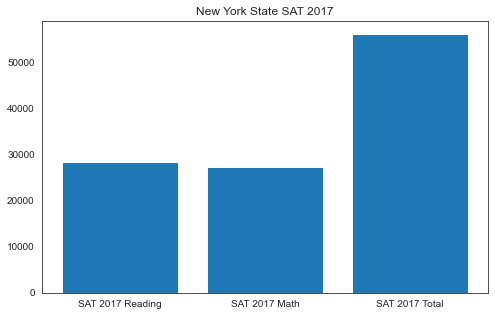

In [229]:
# This shows that scoring highly on Reading and Math are equally important 2017

plt.figure(figsize = (8, 5))
# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 225
# alpha = 0.9
plt.bar(
        ['SAT 2017 Reading', 'SAT 2017 Math', 'SAT 2017 Total'], # X Values
        [test_data['sat_2017_reading_writing'].sum(), test_data['sat_2017_math'].sum(), 
         test_data['sat_2017_total'].sum()], data = test_data
        )
# Create text:
# at (horizontal = 0.5, vertical = 0.15)
# stating "in Google's stock price, compared to 100% increase in the Dow."
# center-aligned
# font size 45
# alpha = 0.5



# No axes.
plt.title('New York State SAT 2017');

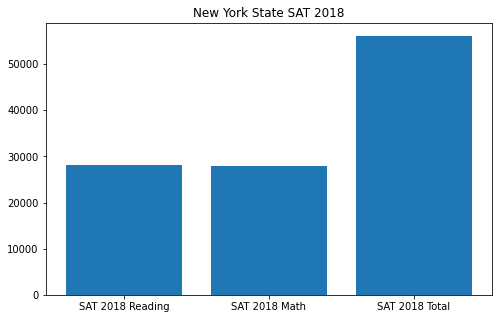

In [135]:
# This shows that scoring highly on Reading and Math are equally important 2018

plt.figure(figsize = (8, 5))
# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 225
# alpha = 0.9
plt.bar(
        ['SAT 2018 Reading', 'SAT 2018 Math', 'SAT 2018 Total'], # X Values
        [test_data['sat_2018_reading_writing'].sum(), test_data['sat_2018_math'].sum(), 
         test_data['sat_2018_total'].sum()], data = test_data
        )
# Create text:
# at (horizontal = 0.5, vertical = 0.15)
# stating "in Google's stock price, compared to 100% increase in the Dow."
# center-aligned
# font size 45
# alpha = 0.5



# No axes.
plt.title('New York State SAT 2018');

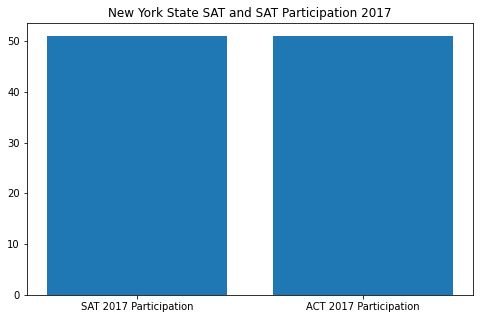

In [158]:
# Shows SAT and ACT participation for NY 2017

plt.figure(figsize = (8, 5))
# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 225
# alpha = 0.9
plt.bar(
        ['SAT 2017 Participation', 'ACT 2017 Participation'], # X Values
        [test_data['sat_2017_participation'].count(), test_data['act_2017_participation'].count()], data = test_data
        )
# Create text:
# at (horizontal = 0.5, vertical = 0.15)
# stating "in Google's stock price, compared to 100% increase in the Dow."
# center-aligned
# font size 45
# alpha = 0.5



# No axes.
plt.title('New York State SAT and SAT Participation 2017');

Text(0, 0.5, 'New York State SAT Score')

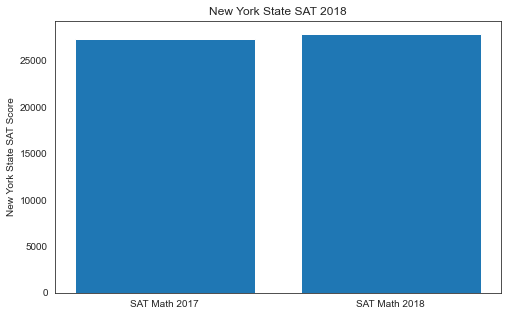

In [258]:
# Math SAT 2017, 2018 Scores Compared

plt.figure(figsize = (8, 5))
# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 225
# alpha = 0.9
plt.bar(
        ['SAT Math 2017 ', 'SAT Math 2018'], # X Values
        [test_data['sat_2017_math'].sum(), test_data['sat_2018_math'].sum()], data = test_data
        )
# Create text:
# at (horizontal = 0.5, vertical = 0.15)
# stating "in Google's stock price, compared to 100% increase in the Dow."
# center-aligned
# font size 45
# alpha = 0.5



# No axes.
plt.title('New York State SAT 2018');
plt.ylabel('New York State SAT Score')

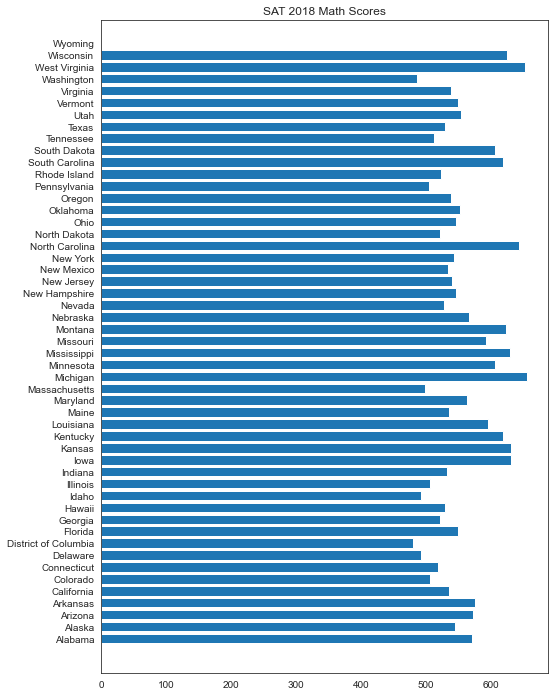

In [262]:
# Math 2018 SAT Math scores across the states
plt.figure(figsize = (8, 12))
plt.barh(test_data['state'],
     test_data['sat_2018_math'])

# Add a title and show the plot.
plt.title('SAT 2018 Math Scores');

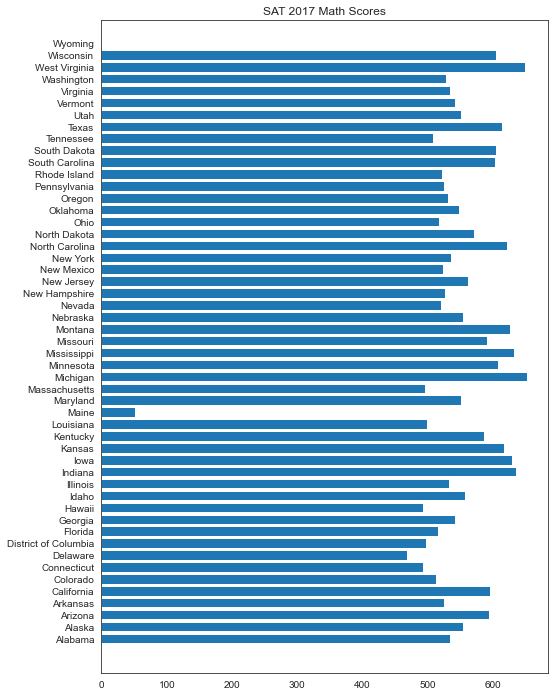

In [264]:
# Math 2017 SAT scores across the states
plt.figure(figsize = (8, 12))
plt.barh(test_data['state'],
     test_data['sat_2017_math'])

# Add a title and show the plot.
plt.title('SAT 2017 Math Scores');

Text(0, 0.5, '2018 SAT Math, Reading & Writing')

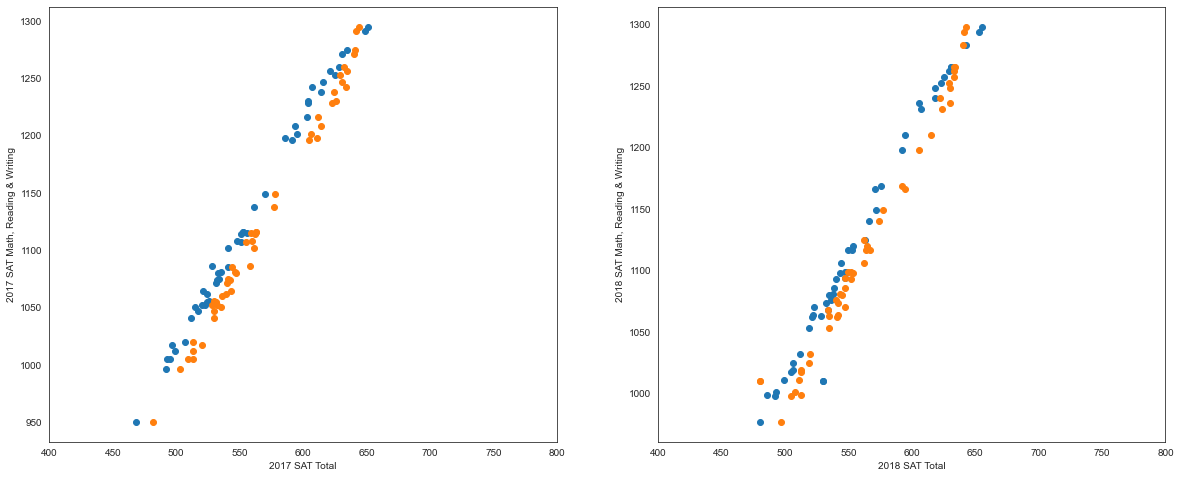

In [154]:
# Plots of math and reading scores for 2017, 2018 as a function of SAT Score
df = test_data

fig, ax = plt.subplots(1, 2, figsize=(20,8))

plot1_xvalue = 'sat_2017_total'
plot1_yvalue1 = 'sat_2017_math'
plot1_yvalue2 = 'sat_2017_reading_writing'
df = test_data



ax[0].scatter(df[plot1_yvalue1],
            df[plot1_xvalue])
ax[0].set_xlim([400, 800])
ax[0].scatter(df[plot1_yvalue2],
            df[plot1_xvalue]);
ax[0].set_xlim([400, 800]);
xlabel = '2017 SAT Total'
ax[0].set_xlabel(xlabel)
ylabel = '2017 SAT Math, Reading & Writing'
ax[0].set_ylabel(ylabel)


plot2_xvalue = 'sat_2018_total'
plot2_yvalue1 = 'sat_2018_math'
plot2_yvalue2 = 'sat_2018_reading_writing'

ax[1].scatter(df[plot2_yvalue1],
            df[plot2_xvalue])
ax[1].set_xlim([400, 800])
ax[1].scatter(test_data[plot2_yvalue2],
            df[plot2_xvalue]);
ax[1].set_xlim([400, 800]);
xlabel = '2018 SAT Total'
ax[1].set_xlabel(xlabel)
ylabel = '2018 SAT Math, Reading & Writing'
ax[1].set_ylabel(ylabel)

In [25]:
import seaborn as sns

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

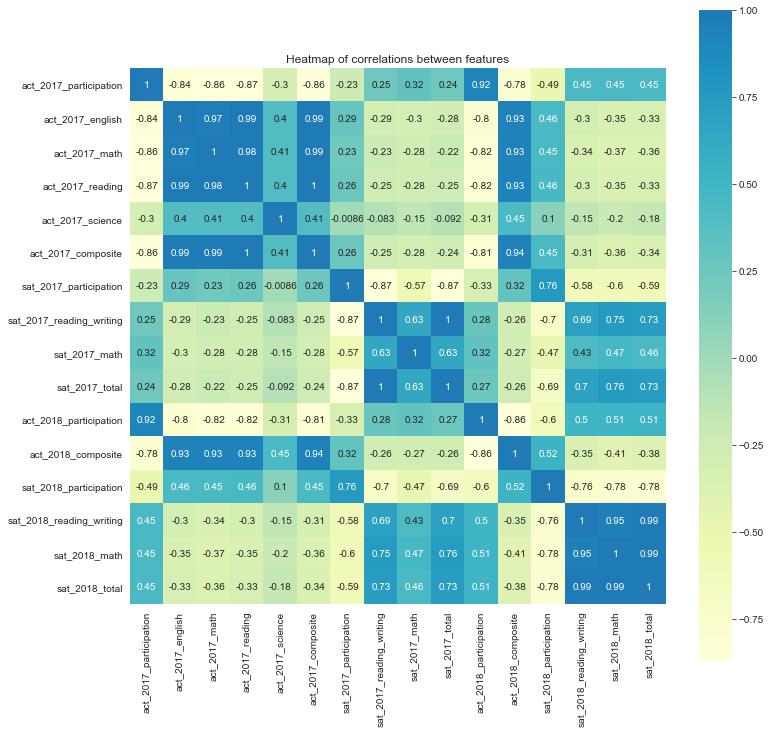

In [288]:
# Heat Map of our combined DataFrame
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,12))
# plt.figure(figsize=(8, 5))
sns.heatmap(test_data.corr(), annot=True, square =True ,
annot_kws={"size": 10} ,center= .5,cmap="YlGnBu"
            ).set_title('Heatmap of correlations between features');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [31]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [248]:
# This creates histograms for the 2017, 2018 SAT and ACT Participation values by State
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
        nrows = int(np.ceil(len(list_of_columns)/2) )# Makes sure you have enough rows
        fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,6)) # You'll want to specify your figsize
        ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
        for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
            sns.distplot(dataframe[column],bins =20 ,ax = ax[i]) # feel free to add more settings

            ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
            ax[i].set_xlabel(list_of_xlabels[i])
        plt.tight_layout()
        

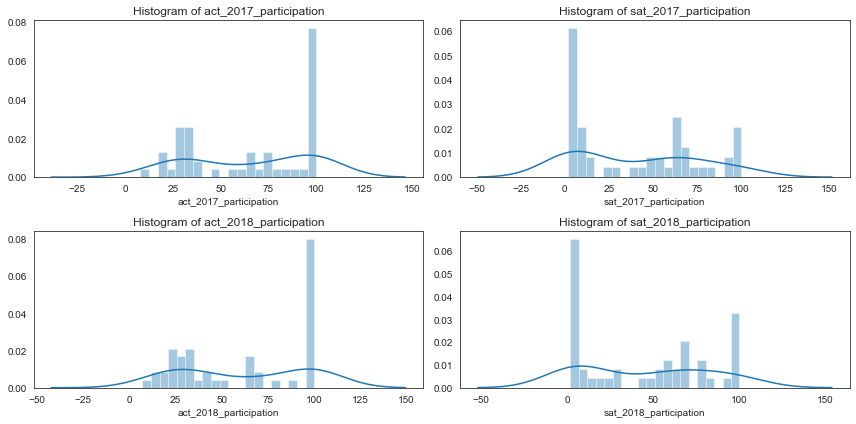

In [265]:
columns_list = ['act_2017_participation', 'sat_2017_participation', 'act_2018_participation', 'sat_2018_participation']
subplot_histograms(test_data, columns_list, ["Histogram of " + column for column in columns_list], columns_list)

In [159]:
test_data.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_writing,sat_2018_math,sat_2018_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,38.0,547.0,533.0,1080.0,100.0,19.1,6.0,595.0,571.0,1166.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,30.0,563.0,553.0,1116.0,33.0,20.8,43.0,562.0,544.0,1106.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,3.0,614.0,594.0,1208.0,66.0,19.2,29.0,577.0,572.0,1149.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,53.0,531.0,524.0,1055.0,100.0,19.4,5.0,592.0,576.0,1169.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,11.0,606.0,595.0,1201.0,27.0,22.7,60.0,540.0,536.0,1076.0


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


**SAT vs ACT math scores for 2017:**

ACT Math Scores seem to be consistantly higher than SAT Math Scores for 2017

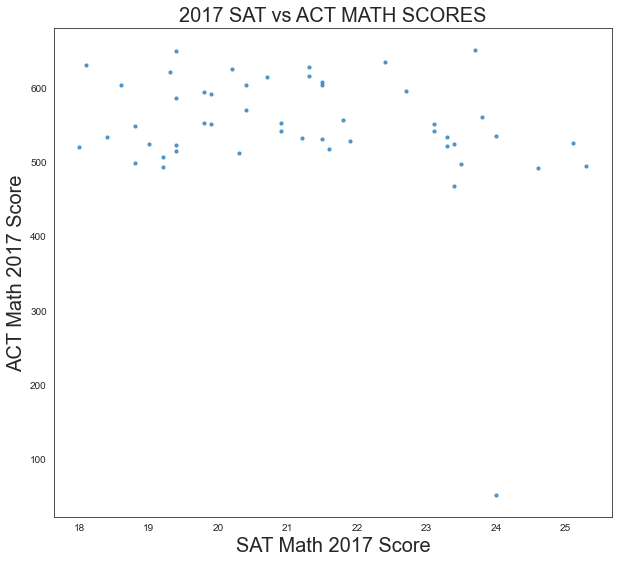

In [167]:
# 2017 SAT vs ACT MATH SCORES
plt.figure(figsize=(10, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(test_data['act_2017_math'],
           test_data['sat_2017_math'],
            alpha=0.7,
            s=10
           )

plt.title("2017 SAT vs ACT MATH SCORES", fontsize = 20)
plt.ylabel("ACT Math 2017 Score", fontsize = 20)
plt.xlabel("SAT Math 2017 Score", fontsize = 20);

**SAT vs. ACT verbal/reading scores for 2017**

SAT vs. ACT total/composite scores for 2017

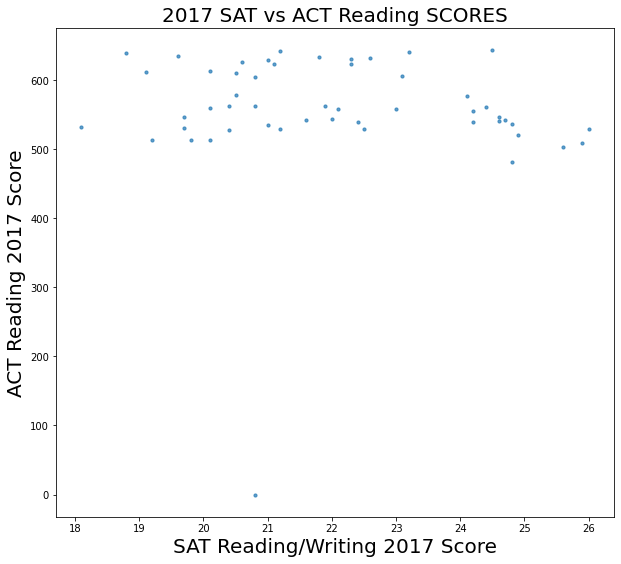

In [159]:
# 2017 SAT vs ACT Reading Scores
plt.figure(figsize=(10, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(test_data['act_2017_reading'],
           test_data['sat_2017_reading_writing'],
            alpha=0.7,
            s=10
           )

plt.title("2017 SAT vs ACT Reading Scores", fontsize = 20)
plt.ylabel("ACT Reading 2017 Score", fontsize = 20)
plt.xlabel("SAT Reading/Writing 2017 Score", fontsize = 20);

**SAT vs. ACT total/composite scores for 2017**

ACT Composite scores are consistantly higher than SAT Total scores.

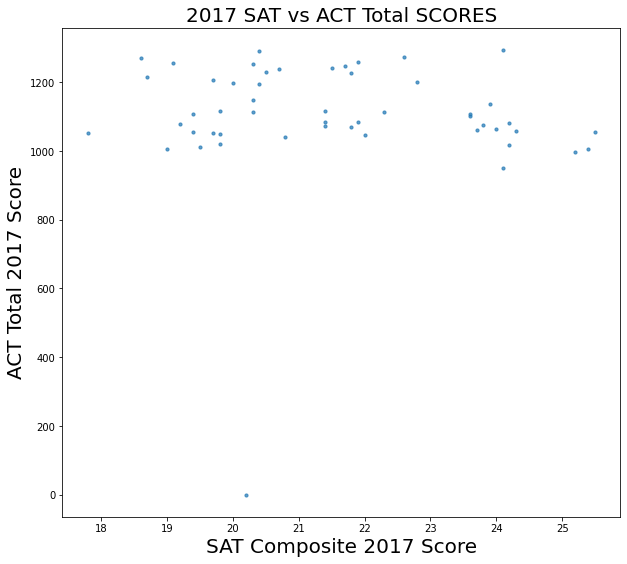

In [161]:
# 2017 SAT vs ACT Total SCORES
plt.figure(figsize=(10, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(test_data['act_2017_composite'],
           test_data['sat_2017_total'],
            alpha=0.7,
            s=10
           )

plt.title("2017 SAT vs ACT Total SCORES", fontsize = 20)
plt.ylabel("ACT Total 2017 Score", fontsize = 20)
plt.xlabel("SAT Composite 2017 Score", fontsize = 20);

**2017 SAT vs SAT 2018 Total Scores**

There are interesting outliners in the plot that should be investigated.

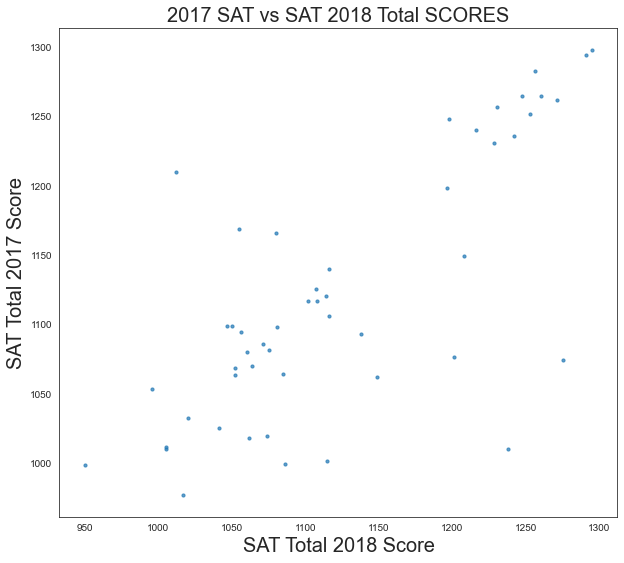

In [171]:
# 2017 SAT vs SAT 2018 Total Scores
plt.figure(figsize=(10, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(test_data['sat_2017_total'],
           test_data['sat_2018_total'],
            alpha=0.7,
            s=10
           )

plt.title("2017 SAT vs SAT 2018 Total Scores", fontsize = 20)
plt.ylabel("SAT Total 2017 Score", fontsize = 20)
plt.xlabel("SAT Total 2018 Score", fontsize = 20);

**Composite scores for ACT 2017 vs. 2018**

There are less outliers in the ACT data than there is in the SAT data

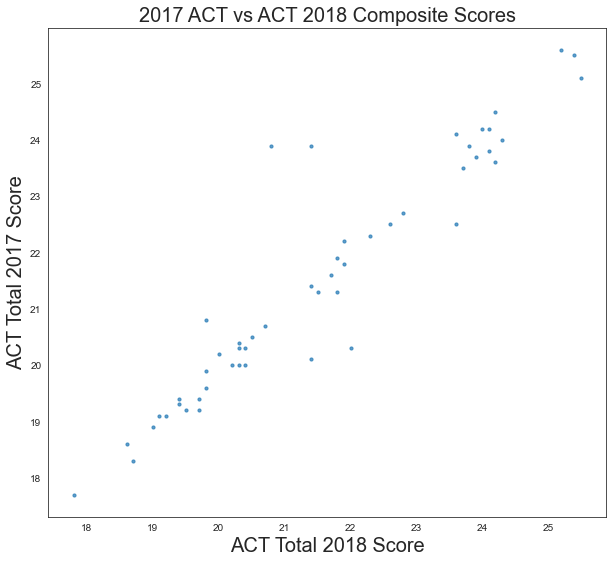

In [175]:
# Establish the size of the figure.
plt.figure(figsize=(10, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(test_data['act_2017_composite'],
           test_data['act_2018_composite'],
            alpha=0.7,
            s=10
           )

plt.title("2017 ACT vs ACT 2018 Composite Scores", fontsize = 20)
plt.ylabel("ACT Total 2017 Score", fontsize = 20)
plt.xlabel("ACT Total 2018 Score", fontsize = 20);

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'ACT 2017 Math Box Plot')

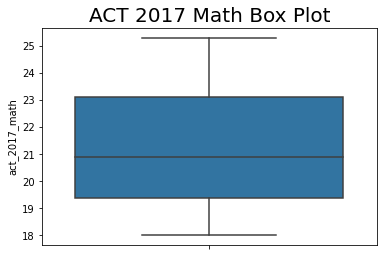

In [166]:
sns.boxplot(test_data['act_2017_math'], orient = 'v');
plt.title("ACT 2017 Math Box Plot", fontsize = 20)

Text(0.5, 1.0, 'ACT 2018 Participation Box Plot')

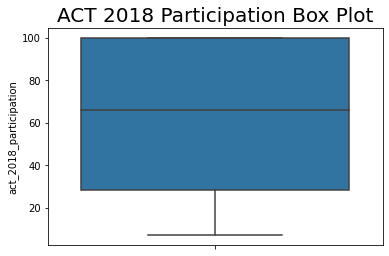

In [167]:
sns.boxplot(test_data['act_2018_participation'], orient = 'v');
plt.title("ACT 2018 Participation Box Plot", fontsize = 20)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: